In [241]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

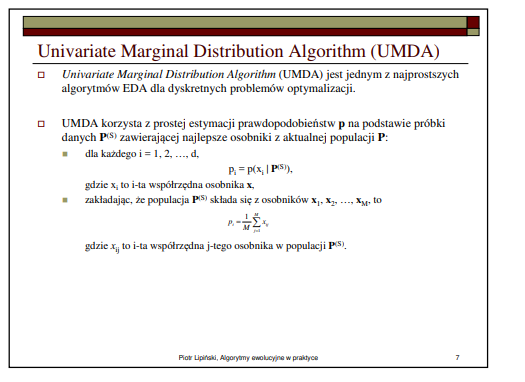

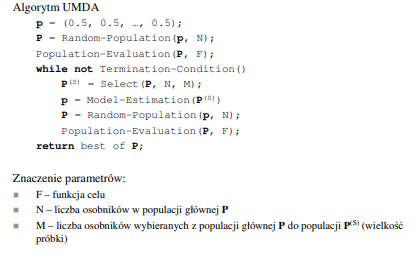

In [242]:
def Random_Population(p, N):
    length = len(p) 
    P = np.zeros((N, length))
    randoms = np.random.random_sample((N,length))
    for index, x in enumerate(randoms):
        p_row = np.where(x< p,1,0)
        P[index] = p_row
    return P    

def Select(P, N, M, objective_values):
    indexs = np.flip(np.argsort(objective_values))[:M]

    best_individuals = P[indexs]
    return best_individuals

def Model_Estimation(Ps):
    length = Ps.shape[1]
    M = Ps.shape[0]
    p = np.zeros(length)
    for x in range(length):
        p[x] = 1/M * np.sum(Ps[:,x])
    return p


def Best_Worst_Individual(a, func):
    indexs = np.flip(np.argsort(func(a)))
    return a[indexs[0]], a[indexs[1]]

def Random_Individual(p):
    length = len(p) 
    P = np.zeros(length)
    randoms = np.random.random_sample(length)
    P = np.where(randoms < p,1,0)
    return P    



def OneMax(P):
    return np.sum(P, axis=1)

def DeceptiveOneMax(P):
    length = len(P[0])
    P = np.sum(P,axis=1)
    for index,x in enumerate(P):
        if x == 0:
            P[index] = length + 1
    return P 




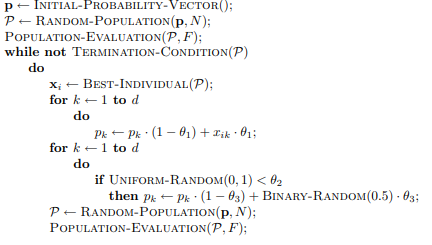

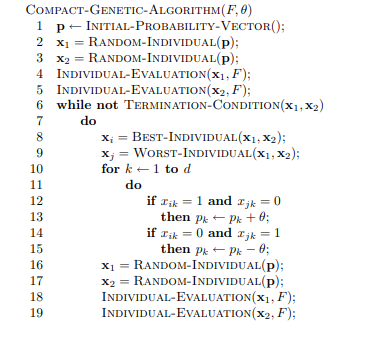

In [243]:

def UMDA(N, M, func, length, iter = 200):
    p = np.ones(length) / 2 
    P = Random_Population(p, N)
    objective_values = func(P)
    i = 0
    while i < iter:
        i +=1
        Ps = Select(P, N, M, objective_values)
        p = Model_Estimation(Ps)
        P = Random_Population(p, N)
        objective_values = func(P)
        if func== OneMax:
            if (P[0] == np.ones(length)).all():
                print('UMDA')
                print(i)
                break
        if func== DeceptiveOneMax:
            if (P[0] == np.ones(length)).all():
                print('UMDA')
                print(i)
                break
    return P[0]



def PBIL(N, func, length,t0, t1,t2, iter=200):
    p = np.ones(length) / 2 
    P = Random_Population(p, N)
    objective_values = func(P)
    i =0
    while i < iter:
        i+=1
        best_individual = Select(P, N, N, objective_values)[0]
        for x in range(length):
            p[x] = p[x] * (1 - t0) + best_individual[x] * t0
        for x in range(length):
            if np.random.uniform() < t1:
                p[x] = p[x] * (1 - t2) +  (1 - np.round(np.random.uniform())) * t2
        P = Random_Population(p, N)
        objective_values = func(P)

        if func== OneMax:
            if (P[0] == np.ones(length)).all():
                print('PBIL')
                print(i)
                break
        if func== DeceptiveOneMax:
            if (P[0] == np.ones(length)).all():
                print('PBIL')
                print(i)
                break

    return Select(P,N,N, objective_values)[0]


def CGA(N, func, length, t0, iter = 200):
    p = np.ones(length) / 2
    x1 = Random_Individual(p)
    x2 = Random_Individual(p)
    i = 0
    while i < iter:
        i +=1
        xi,xj = Best_Worst_Individual([x1,x2], OneMax)
        diff = np.where(xi != xj)[0]
        for x in diff:
            if xi[x] == 1:

                p[x] += t0
            else:
                p[x] -=  t0
        if func== OneMax:
            if (list(xi) == list(np.ones(length))):
                print('CGA')
                print(i)
                break
        x1 = Random_Individual(p)
        x2 = Random_Individual(p)

    return xi

#CGA(125, OneMax, 100, 1/10, iter=500000)
UMDA(125,50,OneMax, 100, iter = 1000)
PBIL(125,OneMax, 100, t0 = 0.01, t1=0.05, t2 = 0.01, iter = 1000)



UMDA
15
PBIL
719


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [244]:
print(CGA(125, DeceptiveOneMax, 100, 1/10, iter=1000000))
print(UMDA(125,50,DeceptiveOneMax, 100, iter = 1000))
print(PBIL(125,DeceptiveOneMax, 100, t0 = 0.1, t1=0.01, t2 = 0.45, iter = 1000))


[1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1]
UMDA
15
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
PBIL
70
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


## Lista 6 zadanie 3

In [245]:
!pip install git+https://github.com/baopng/NSGA-II.git

  Cloning https://github.com/baopng/NSGA-II.git to /tmp/pip-req-build-7ue09a9i
  Running command git clone -q https://github.com/baopng/NSGA-II.git /tmp/pip-req-build-7ue09a9i
  Created wheel for nsga-2: filename=nsga_2-0.1-cp36-none-any.whl size=4644 sha256=2186c9ba6650e04a10cd35b9929926299d995ad32522b4b2b2630e8b0be55856
  Stored in directory: /tmp/pip-ephem-wheel-cache-o9nr9iet/wheels/e5/2a/3d/8ea13aff66489365c34c66bc0f0014906957109d587e882240
Successfully built nsga-2


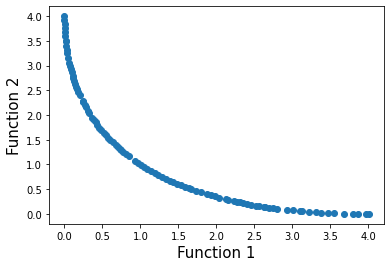

In [246]:

from nsga2.problem import Problem
from nsga2.evolution import Evolution
import matplotlib.pyplot as plt

def f1(x):
    return x**2

def f2(x):
    return (x-2)**2

problem = Problem(num_of_variables=1, objectives=[f1, f2], variables_range=[(-10**3, 10**3)])
evo = Evolution(problem)
evol = evo.evolve()
func = [i.objectives for i in evol]

function1 = [i[0] for i in func]
function2 = [i[1] for i in func]
plt.xlabel('Function 1', fontsize=15)
plt.ylabel('Function 2', fontsize=15)
plt.scatter(function1, function2)
plt.show()

In [248]:
print(function1)
print(function2)
print(evol[0].objectives)

[4.004567335431366, 3.966788680135998, 3.8690599144140303, 3.799535664553019, 3.6774977336757892, 3.5505602949060306, 3.463300665974007, 3.3741679144602226, 3.3114687481125205, 3.2241247825685173, 3.1298282902029713, 3.096753878273604, 3.004924131276894, 2.927055248423766, 2.7995186646872523, 2.7505487476256554, 2.689111510325207, 2.6398685105492596, 2.6244305202210114, 2.5654120206780973, 2.520860561820444, 2.448586666019138, 2.3981946907198237, 2.355154880823421, 2.3073468336631264, 2.272792887699977, 2.2296648623371595, 2.154665436881575, 2.1295404304740333, 2.030708913421754, 1.9759691675505082, 1.9268665963802334, 1.869603305500265, 1.7976319921754143, 1.7277905203979622, 1.6610476078675946, 1.6367183510865233, 1.5805235704653409, 1.5288411722431938, 1.4794913197215815, 1.4349986594327884, 1.3920631540083903, 1.3352446038952157, 1.2804764111282794, 1.2349030038387927, 1.1902616741874987, 1.139575739279874, 1.0856496263500042, 1.0481313203006466, 1.0056227756312595, 0.9625397250336